<a href="https://colab.research.google.com/github/erhnk/Churn-Modelling/blob/main/K%C3%BCt%C3%BCphanelerin_y%C3%BCklenmesi_ve_veri_hakk%C4%B1nda_bilgi_edinilmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install researchpy

In [ ]:
!pip install keras-tuner

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import researchpy as rp
import lightgbm as lgb
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.metrics import roc_curve, auc

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


1. CreditScore: Müşterinin kredi skorunu belirtir.
2. Geography: Müşterinin ülkesini belirtir.
3. Gender: Müşteri cinsiyetini belirtir.
4. Age: Müşterinin yaşını belirten sütundur.
5. Tenure: Müşterinin banka ile çalışma süresini belirten sütundur.
6. Balance: Müşterinin bakiyesini belirten sütundur.
7. NumOfProducts: Müşterinin sahip olduğu ürün sayısını belirten sütundur.
8. HasCrCard: Müşterinin Kredi kartı sahibi olup olmadığını belirten sütundur.
9. IsActiveMember: Müşterinin aktif kullanıcı olup olmadığımı belirten sütundur.
10. EstimatedSalary: Müşterinin tahmini yıllık maaşını belirten sütundur.
11. Exited: Müşterinin bankadan ayrılıp ayrılmadığını belirten sütundur.
12. RowNumber: Müşterinin sütun numarasını belirtir.
13. CustomerId: Müşterinin kullanıcı numarasını belirten sütundur.
14. Surname: Müşteri soyadını belirten sütundur.









In [ ]:
#Veri setimizde var olan RowNumber, CustomerId ve Surname sütunları önemsiz olduğundan veri setimizden sileceğiz.
#Aynı zamanda müşterinin cinsiyeti ve ülkesi bankadan ayrılıp ayrılmayacağını etkilemeyeceğinden bu değerleri nümerik hale dönüştürürken One Hot dönüşümü yapacağız.
#Yaş sütununu belli aralıklara göre gruplayıp kategorik hale dönüştüreceğiz, ardından one hot dönüşümü ile nümerik değerlere dönüştüreceğiz.

In [8]:
data["Exited"].sum()
#Veri setinde 2037 tane bankadan ayrılmış müşteri var.

2037

In [9]:
#Veri setinde boş değer var mı yok mu bakalım.
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Görüldüğü gibi veri setinde boş değer yoktur.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Veri setimizdeki kategorik değerlerin içerisindeki eşsiz değerleri listeleyelim.

In [ ]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data["HasCrCard"].unique()

array([1, 0])

In [ ]:
data["IsActiveMember"].unique()

array([1, 0])

In [ ]:
data["Exited"].unique()

array([1, 0])

In [ ]:
#Veri setimizdeki kategorik sütunların içerisindeki sınıfların yüzdelerine bakalım.

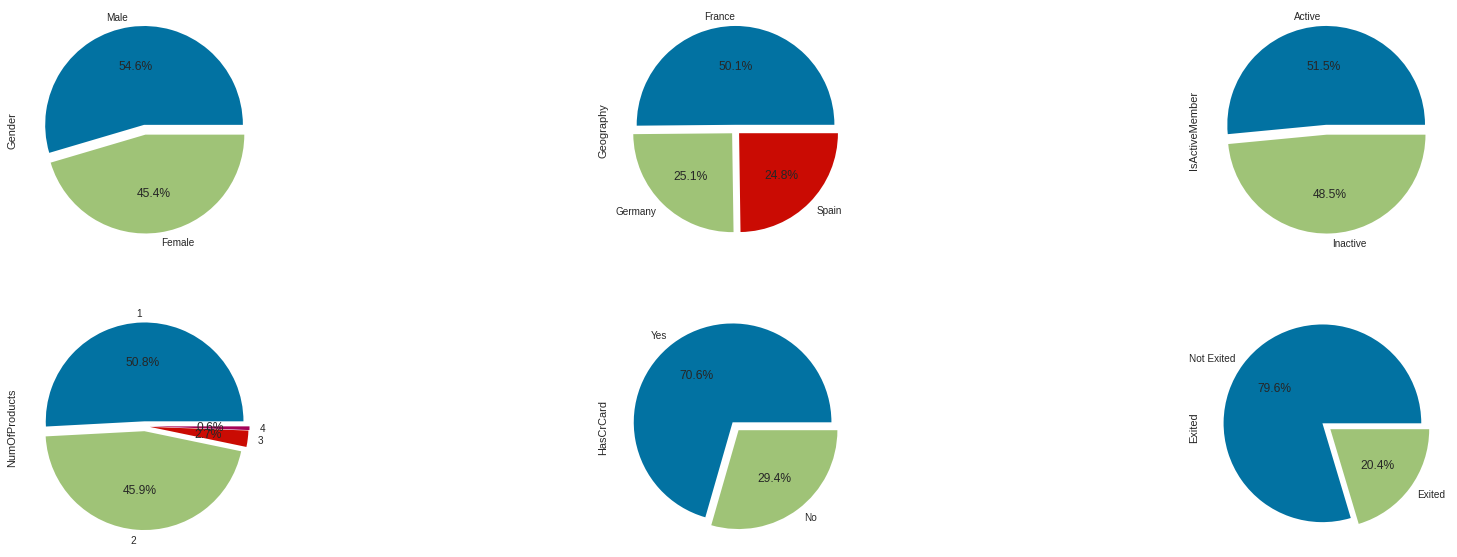

In [ ]:
fig, axarr = plt.subplots(2, 3, figsize=(30, 10))
data["Gender"].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',ax=axarr[0][0]);
data["Geography"].value_counts().plot.pie(explode = [0.05,0.05,0.05], autopct = '%1.1f%%',ax=axarr[0][1]);
data["IsActiveMember"].value_counts().plot.pie(labels = ["Active","Inactive"],explode = [0.05,0.05], autopct = '%1.1f%%',ax=axarr[0][2]);
data["NumOfProducts"].value_counts().plot.pie(explode = [0.05,0.05,0.05,0.06], autopct = '%1.1f%%',ax=axarr[1][0]);
data["HasCrCard"].value_counts().plot.pie(labels = ["Yes","No"],explode = [0.05,0.05], autopct = '%1.1f%%',ax=axarr[1][1]);
data["Exited"].value_counts().plot.pie(labels = ["Not Exited","Exited"],explode = [0.05,0.05], autopct = '%1.1f%%',ax=axarr[1][2]);

In [ ]:
#Müşterilerin çoğunluğunun erkek olduğu görülmektedir.
#Müşterilerimizin çoğu Fransız müşterilerdir. Aynı zamanda Fransız müşterilerin varlığı Alman ve ispanyol müşterilerin varlığının neredeyse 2 katıdır.
#Müşterilerimizin çoğunluğu aktif kullanıcı olmasına rağmen aktif olmayan kullanıcılarımızın yüzdesi bir hayli yüksektir.
#Müşterilerimizin %96,7'si en fazla 2 ürüne sahiptir.
#Müşterilerimizin çoğunluğu kredi kartına sahiptir.
#Veri setimizdeki müşterilerin %79,6'sı bankanın müşteri olmaya devam etmektedir.

In [ ]:
#Betimleyici istatistik değerlerine bakalım.

In [ ]:
#nümerik sütunlar
rp.summary_cont(data[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CreditScore,10000.0,650.5288,96.6533,0.9665,648.6342,652.4234
1,Age,10000.0,38.9218,10.4878,0.1049,38.7162,39.1274
2,Tenure,10000.0,5.0128,2.8922,0.0289,4.9561,5.0695
3,Balance,10000.0,76485.8893,62397.4052,623.9741,75262.7746,77709.0040
4,NumOfProducts,10000.0,1.5302,0.5817,0.0058,1.5188,1.5416
5,EstimatedSalary,10000.0,100090.2399,57510.4928,575.1049,98962.9185,101217.5613


In [ ]:
#Kategorik sütunlar
rp.summary_cat(data[["Geography","Gender","HasCrCard","IsActiveMember","Exited"]])

,Variable,Outcome,Count,Percent
0,Geography,France,5014,50.14
1,,Germany,2509,25.09
2,,Spain,2477,24.77
3,Gender,Male,5457,54.57
4,,Female,4543,45.43
5,HasCrCard,1,7055,70.55
6,,0,2945,29.45
7,IsActiveMember,1,5151,51.51
8,,0,4849,48.49
9,Exited,0,7963,79.63


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
data.shape
#Veri setimizdeki 10000 veri örneği ve 14 sütun olduğunu görelim.

(10000, 14)

In [ ]:
data.columns
#Veri setimizdeki sütunlar

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')